<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Load-data-set" data-toc-modified-id="Load-data-set-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Load data set</a></span></li></ul></li><li><span><a href="#Consonant-Stats" data-toc-modified-id="Consonant-Stats-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Consonant Stats</a></span><ul class="toc-item"><li><span><a href="#Total-consonant-stats" data-toc-modified-id="Total-consonant-stats-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Total consonant stats</a></span></li><li><span><a href="#Words-with-consonant-stats" data-toc-modified-id="Words-with-consonant-stats-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Words with consonant stats</a></span></li><li><span><a href="#Treemap-graphs" data-toc-modified-id="Treemap-graphs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Treemap graphs</a></span></li></ul></li><li><span><a href="#CV-Stats" data-toc-modified-id="CV-Stats-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CV Stats</a></span><ul class="toc-item"><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#Total-syllable-stats" data-toc-modified-id="Total-syllable-stats-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Total syllable stats</a></span></li><li><span><a href="#Words-with-syllable-stats" data-toc-modified-id="Words-with-syllable-stats-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Words with syllable stats</a></span></li><li><span><a href="#Treemap-graphs" data-toc-modified-id="Treemap-graphs-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Treemap graphs</a></span></li></ul></li></ul></div>

## Packages

In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import squarify

## Load data set

In [2]:
file_name = "PtLanka-final.csv"

word_df = pd.read_csv(file_name)
word_df

,Unnamed: 0,SriLanka_creole,phonetic_transcription,Portuguese_definition,Portuguese_IPA,English_definition,pos,Related_languages,pt_related annotations,sources,original_full_entry,original_Portuguese_definition,original_linguistic_notes,page
0,0,Abaço,abaso,abaixo,ɐ.ˈbaj.ʃu,below,adverb,NaN,NaN,NaN,"Abaço, abaixo. P. us. V.",abaixo,pouco usado,135.0
1,1,Aberçà,abeɾsaː,abraçar,ɐ.bɾɐ.ˈsaɾ,hug,verb,NaN,NaN,"O Bruffador, ii periódico","Aberçà, abersà, aburçá {Br. 2), abraçar.",abraçar,NaN,135.0
2,2,abersà,abeɾsaː,abraçar,ɐ.bɾɐ.ˈsaɾ,hug,verb,NaN,NaN,"O Bruffador, ii periódico","Aberçà, abersà, aburçá {Br. 2), abraçar.",abraçar,NaN,135.0
3,3,aburçá,abuɾsaː,abraçar,ɐ.bɾɐ.ˈsaɾ,hug,verb,NaN,NaN,"O Bruffador, ii periódico","Aberçà, abersà, aburçá {Br. 2), abraçar.",abraçar,NaN,135.0
4,4,Aburcé,abuɾseː,aborrecer,ɐ.bu.Rɨ.ˈseɾ,annoy,verb,NaN,NaN,NaN,Aburcé. Mais us. burcé.,Mesmo que burcé,NaN,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,2517,Wine,ʋine,vinho europeu,NaN,european wine,noun,English,NaN,NaN,NaN,vinho europeu,NaN,NaN
2518,2518,Zumbá,zumbaː,zombar,NaN,mock,verb,NaN,NaN,NaN,"Zumba, zombar. Zombe-rías, zombrias, zombàrios...",zombar,NaN,182.0
2519,2519,Zomberías,zombeɾiːas,zombarias,NaN,mockery,noun,NaN,NaN,NaN,NaN,zombarias,NaN,NaN
2520,2520,zombrias,zombɾias,zombarias,NaN,mockery,noun,NaN,NaN,NaN,NaN,zombarias,NaN,NaN


In [3]:
word_df["Portuguese_IPA"] = word_df["Portuguese_IPA"].fillna("")
word_list = list(word_df["Portuguese_IPA"])
word_list = [" ".join(list(str(i))) for i in word_list]
word_list

['ɐ . ˈ b a j . ʃ u',
 'ɐ . b ɾ ɐ . ˈ s a ɾ',
 'ɐ . b ɾ ɐ . ˈ s a ɾ',
 'ɐ . b ɾ ɐ . ˈ s a ɾ',
 'ɐ . b u . R ɨ . ˈ s e ɾ',
 '',
 'ɐ . b u . R ɨ . ˈ s i . d u',
 'a w . ˈ z ẽ . s j ɐ',
 '',
 '',
 '',
 'ˈ k a',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'ɐ . ˈ s o w . ɡ ɨ',
 '',
 '',
 '',
 'ɐ . ˈ d e w ʃ',
 'ˈ d o w . t u',
 '',
 '',
 '',
 '',
 '',
 '',
 'ɐ . d u ɫ . t ˈ ɛ . ɾ i . u',
 'ɐ . d u ɫ . t ˈ ɛ . ɾ i . u',
 '',
 '',
 '',
 '',
 '',
 'ɐ . f ɐ j . ˈ s ɐ ̃ w ̃',
 '',
 'a . g w ɐ',
 '',
 '',
 '',
 'ɐ . ɡ ɾ ɐ . ˈ d a . v ɛ ɫ',
 'ˈ v w a ɾ',
 'ˈ v w a ɾ',
 'ɐ . ˈ ĩ . d ɐ',
 '',
 '',
 '',
 '',
 'ˈ a ɾ . v u . ɾ ɨ',
 'ˈ a ɾ . v u . ɾ ɨ',
 'ˈ a ɾ . v u . ɾ ɨ',
 '',
 'a ɫ . ˈ d ɐ j . ɐ',
 'ɐ . ˈ l ɛ . ɡ ɾ ɨ',
 'ɐ . ˈ l ɛ . ɡ ɾ ɨ',
 '',
 '',
 'a ɫ . m u . ˈ f a . d ɐ',
 'a ɫ . ˈ f ɐ ̃ . d ɨ . ɡ ɐ',
 'a ɫ . f ɐ j . ˈ a . t ɨ',
 '',
 '',
 '',
 '',
 'a ɫ . ˈ ɡ ɐ ̃ j ̃',
 '',
 '',
 '',
 '',
 '',
 'ɐ . ˈ l ɛ . ɡ ɾ ɨ',
 'ɐ . ˈ l ɛ . ɡ ɾ ɨ',
 'ɐ . ˈ l ɛ . ɡ ɾ ɨ',
 'ɐ . l ɨ . ˈ ɡ ɾ i . ɐ',


# Consonant Stats

In [4]:
word_list = [re.sub(" \.", "", i) for i in word_list]
word_list = [re.sub(" ˈ", "", i) for i in word_list]
word_list = [re.sub("(?<=[aeiout]) ː", "ː", i) for i in word_list]
word_list = [re.sub("(?<=[nl]) ʲ", "ʲ", i) for i in word_list]
word_list = [re.sub("d ̠ ʒ", "d̠ʒ", i) for i in word_list]
word_list = [re.sub("t ̠ ʃ", "t̠ʃ", i) for i in word_list]
word_list = [re.sub("^", " ", i) for i in word_list]
word_list = [re.sub("$", " ", i) for i in word_list]

word_list[0:10]

[' ɐ b a j ʃ u ',
 ' ɐ b ɾ ɐ s a ɾ ',
 ' ɐ b ɾ ɐ s a ɾ ',
 ' ɐ b ɾ ɐ s a ɾ ',
 ' ɐ b u R ɨ s e ɾ ',
 '  ',
 ' ɐ b u R ɨ s i d u ',
 ' a w z ẽ s j ɐ ',
 '  ',
 '  ']

In [5]:
word_list_split = [i.split(" ") for i in word_list]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split = [x for x in word_list_split if x]
vowel_punct = ["a","aː","e","eː","i","iː","o","oː","u","uː","ə","-"]
word_list_split = [e for e in word_list_split if e not in vowel_punct]

## Total consonant stats

In [6]:
counts = Counter(word_list_split)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["IPA", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,IPA,count
0,ɐ,787
1,ɾ,688
2,ɨ,403
3,d,298
4,t,293
5,s,276
6,̃,241
7,ˈ,223
8,k,201
9,p,195


## Words with consonant stats

In [7]:
IPA_list = list(df["IPA"])
in_word_list = []
for word in IPA_list:
    word_search = " "+ word + " "
    matches = len([match for match in word_list if word_search in match])
    in_word_list.append(matches)
df["word_count"] = in_word_list
df["IPA_count_label"] = df["IPA"] + " : " + df["count"].astype(str)
df["IPA_word_count_label"] = df["IPA"] + " : " + df["word_count"].astype(str)
df

,IPA,count,word_count,IPA_count_label,IPA_word_count_label
0,ɐ,787,575,ɐ : 787,ɐ : 575
1,ɾ,688,560,ɾ : 688,ɾ : 560
2,ɨ,403,340,ɨ : 403,ɨ : 340
3,d,298,253,d : 298,d : 253
4,t,293,273,t : 293,t : 273
5,s,276,256,s : 276,s : 256
6,̃,241,146,̃ : 241,̃ : 146
7,ˈ,223,223,ˈ : 223,ˈ : 223
8,k,201,200,k : 201,k : 200
9,p,195,189,p : 195,p : 189


## Treemap graphs

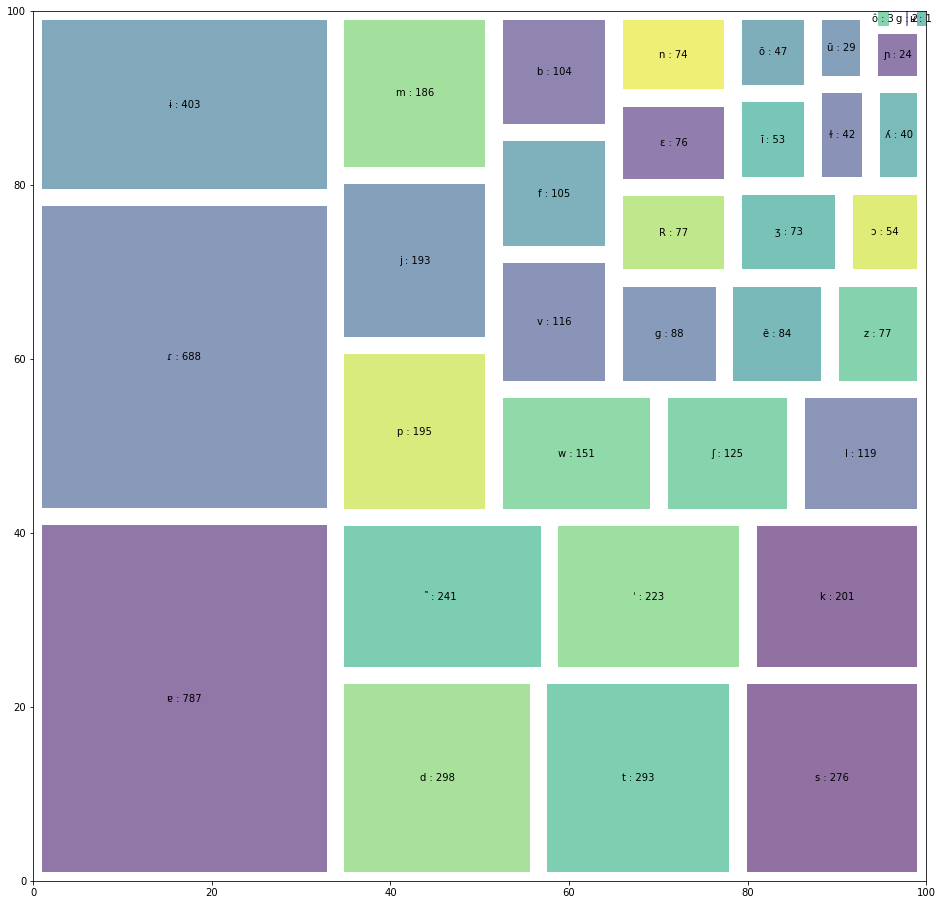

In [8]:
labels = list(df["IPA_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

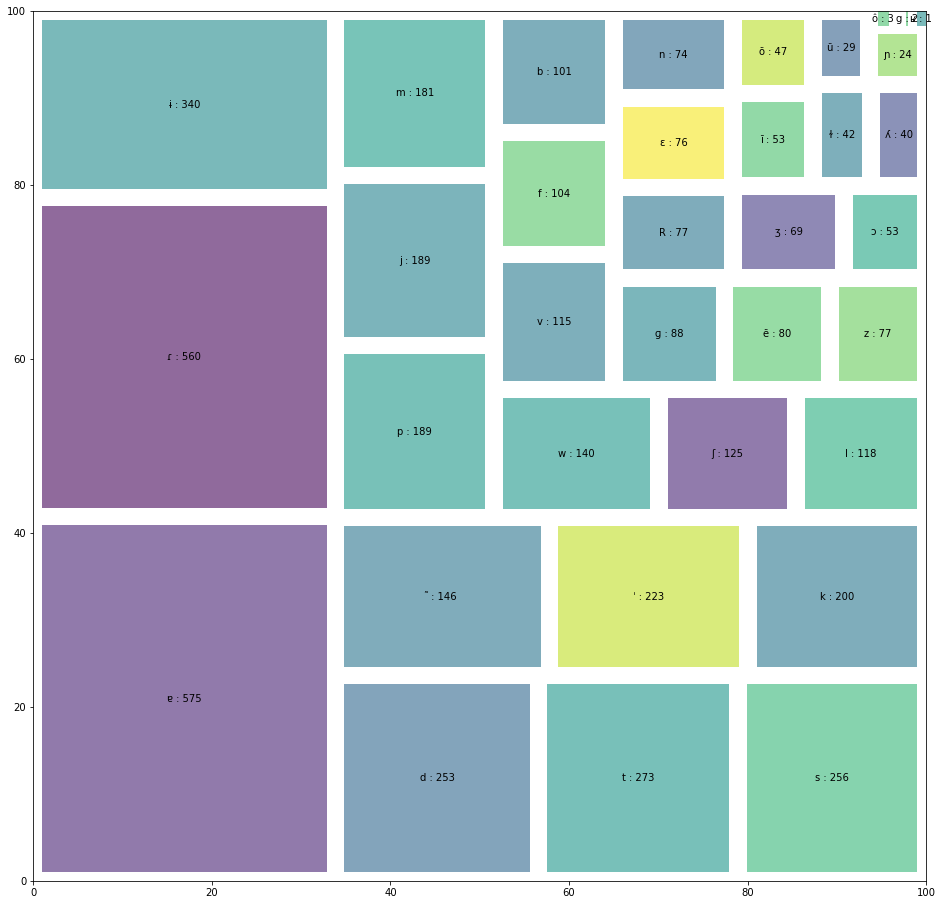

In [9]:
labels = list(df["IPA_word_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

# CV Stats

## Load dataset

In [10]:
file_name = "crioulo_IPA_CV_pt.csv"

word_df = pd.read_csv(file_name)
word_df = word_df.fillna("")
word_df

,SriLanka_creole,Portuguese_IPA,phono_CV
0,Abaço,ɐ.ˈbaj.ʃu,V.CVC.CV
1,Aberçà,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
2,abersà,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
3,aburçá,ɐ.bɾɐ.ˈsaɾ,V.CCV.CVC
4,Aburcé,ɐ.bu.Rɨ.ˈseɾ,V.CV.CV.CVC
...,...,...,...
2517,Wine,,
2518,Zumbá,,
2519,Zomberías,,
2520,zombrias,,


In [11]:
word_list_CV = list(word_df["phono_CV"].apply(str))
word_list_split = [i.split(".") for i in word_list_CV]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split = [i.split(" ") for i in word_list_split]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split[:] = [x for x in word_list_split if x]

## Total syllable stats

In [12]:
counts = Counter(word_list_split)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["CV", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,CV,count
0,CV,1566
1,CVC,605
2,V,242
3,CCV,211
4,VC,111
5,CVG,77
6,CCVC,34
7,VG,15
8,CVCC,6
9,CCVG,3


In [13]:
list(df["CV"])

['CV',
 'CVC',
 'V',
 'CCV',
 'VC',
 'CVG',
 'CCVC',
 'VG',
 'CVCC',
 'CCVG',
 'VCC',
 'CCCV',
 'CVGC']

## Words with syllable stats

In [14]:
word_list_CV = [re.sub("\.", " ", i) for i in word_list_CV]
word_list_CV = [re.sub("^", " ", i) for i in word_list_CV]
word_list_CV = [re.sub("$", " ", i) for i in word_list_CV]

In [15]:
CV_list = list(df["CV"])
in_word_list = []
for word in CV_list:
    word_search = " "+ word + " "
    matches = len([match for match in word_list_CV if word_search in match])
    in_word_list.append(matches)
df["word_count"] = in_word_list
df["word_count"] = in_word_list
df["CV_count_label"] = df["CV"] + " : " + df["count"].astype(str)
df["CV_word_count_label"] = df["CV"] + " : " + df["word_count"].astype(str)
df

,CV,count,word_count,CV_count_label,CV_word_count_label
0,CV,1566,825,CV : 1566,CV : 825
1,CVC,605,517,CVC : 605,CVC : 517
2,V,242,230,V : 242,V : 230
3,CCV,211,206,CCV : 211,CCV : 206
4,VC,111,111,VC : 111,VC : 111
5,CVG,77,75,CVG : 77,CVG : 75
6,CCVC,34,34,CCVC : 34,CCVC : 34
7,VG,15,15,VG : 15,VG : 15
8,CVCC,6,6,CVCC : 6,CVCC : 6
9,CCVG,3,3,CCVG : 3,CCVG : 3


## Treemap graphs

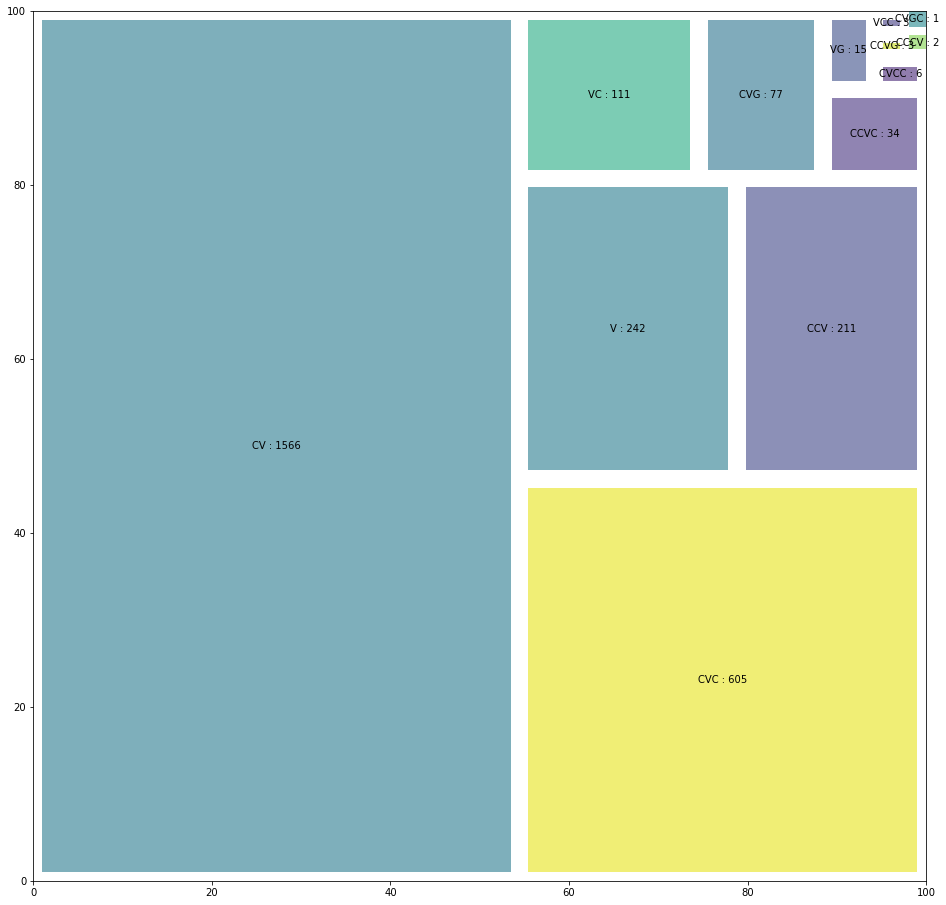

In [16]:
labels = list(df["CV_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

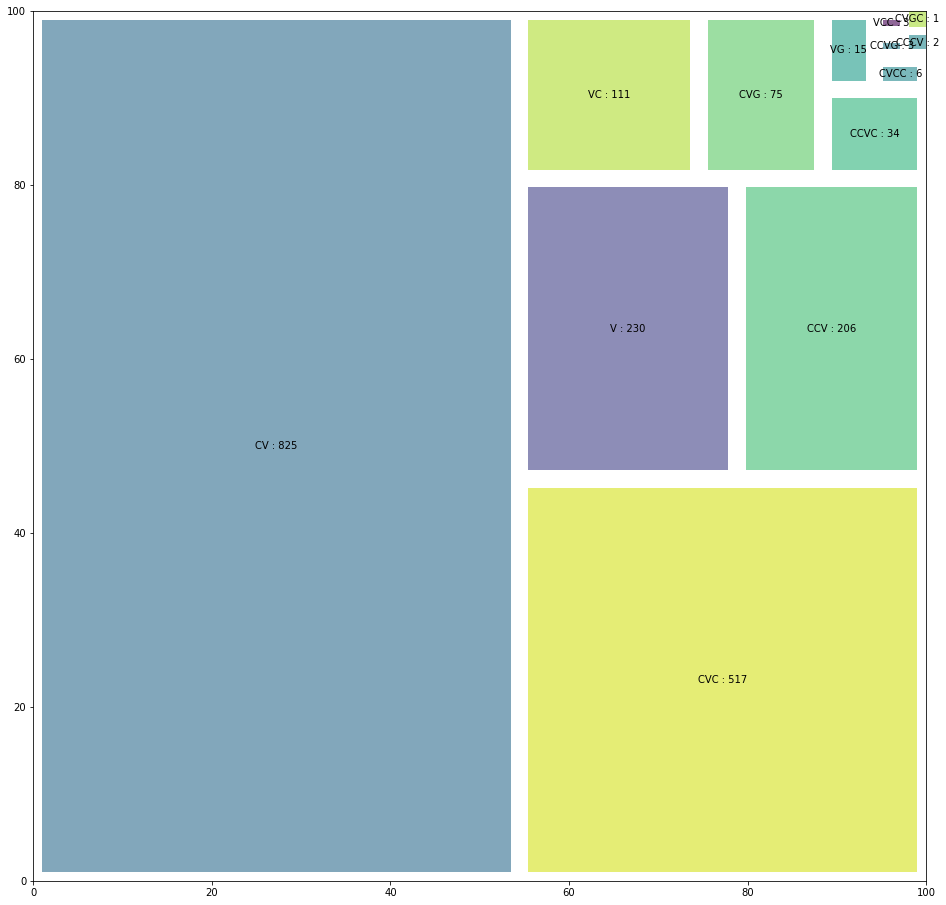

In [17]:
labels = list(df["CV_word_count_label"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

In [21]:
word_df[word_df['phono_CV']=="VG"]

,SriLanka_creole,Portuguese_IPA,phono_CV
1591,Ô,ow,VG
